# Computer Vision
## Homework 6
### Kamal Subedi 

In [11]:
## import numpy as np
from scipy.signal import convolve2d
from scipy.fft import fft2, ifft2, fftshift
from scipy.optimize import least_squares
from scipy.ndimage import sobel

def ssd(image1, image2):
    """Compute Sum of Squared Differences between two images."""
    return np.sum((image1 - image2)**2)

def windowed_ssd(image1, image2, window_size):
    """Compute Windowed Sum of Squared Differences between two images."""
    kernel = np.ones((window_size, window_size))
    ssd_map = convolve2d((image1 - image2)**2, kernel, mode='same', boundary='symm')
    return ssd_map

def robust_diff(image1, image2, alpha):
    """Compute Sum of Robust Differences between two images."""
    diff = np.abs(image1 - image2)
    return np.sum(np.power(diff, alpha))

def absolute_diff(image1, image2):
    """Compute Sum of Absolute Differences between two images."""
    return np.sum(np.abs(image1 - image2))

def normalized_cross_correlation(image1, image2):
    """Compute Normalized Cross-Correlation between two images."""
    numerator = np.sum(image1 * image2)
    denominator = np.sqrt(np.sum(image1**2) * np.sum(image2**2))
    return numerator / denominator


def fft_correlation(image1, image2):
    """Compute Fourier-Based Correlation between two images."""
    fft_image1 = fft2(image1)
    fft_image2 = fft2(image2)
    cross_power_spectrum = fft_image1 * np.conj(fft_image2)
    cross_correlation = np.real(ifft2(cross_power_spectrum))
    return cross_correlation

def bias_gain_compensated_squared_diff(image1, image2):
    """Compute bias–gain compensated squared differences between two images."""
    # Assuming you have a set of equations representing bias-gain compensation
    def residuals(params, image1, image2):
        # params[0] represents the bias, params[1] represents the gain
        compensated_image2 = params[0] + params[1] * image2
        return (image1 - compensated_image2).flatten()

    #Initial guess for parameters
    initial_params = [0.0, 1.0]
    #Solve the least squares problem
    result = least_squares(residuals, initial_params, args=(image1, image2))
    #Extract the compensated parameters
    bias, gain = result.x
    #Compute the compensated squared differences
    compensated_squared_diff = np.sum((image1 - (bias + gain * image2))**2)
    return compensated_squared_diff

def phase_correlation(image1, image2):
    """Compute phase correlation between two images."""
    fft_image1 = fft2(image1)
    fft_image2 = fft2(image2)
    cross_power_spectrum = fft_image1 * np.conj(fft_image2)
    phase_correlation_map = fftshift(np.real(ifft2(cross_power_spectrum / np.abs(cross_power_spectrum))))
    # Find the peak in the phase correlation map
    peak_position = np.unravel_index(np.argmax(phase_correlation_map), phase_correlation_map.shape)
    return peak_position

def gradient_cross_correlation(image1, image2):
    """Compute gradient cross-correlation between two images."""
    gradient_x_image1 = sobel(image1, axis=1)
    gradient_y_image1 = sobel(image1, axis=0)

    gradient_x_image2 = sobel(image2, axis=1)
    gradient_y_image2 = sobel(image2, axis=0)

    cross_correlation_x = convolve2d(gradient_x_image1, gradient_x_image2[::-1, ::-1], mode='same', boundary='symm')
    cross_correlation_y = convolve2d(gradient_y_image1, gradient_y_image2[::-1, ::-1], mode='same', boundary='symm')

    gradient_cross_corr = np.sum(np.abs(cross_correlation_x) + np.abs(cross_correlation_y))

    return gradient_cross_corr


#Example usage:
alpha = 1.2
image1 = np.random.rand(100, 100)  # Replace with your image data
image2 = np.random.rand(100, 100)  # Replace with your image data

result_ssd = ssd(image1, image2)
print(f"SSD Result: {result_ssd}")

window_size = 5
result_windowed_ssd = windowed_ssd(image1, image2, window_size)
print(f"Windowed SSD Result: {result_windowed_ssd}")

result_robust_diff = robust_diff(image1, image2, alpha)
print(f"Robust Differences Result: {result_robust_diff}")

result_absolute_diff = absolute_diff(image1, image2)
print(f"Absolute Differences Result: {result_absolute_diff}")

result_norm_cross_corr = normalized_cross_correlation(image1, image2)
print(f"Normalized Cross-Correlation Result: {result_norm_cross_corr}")

result_fft_corr = fft_correlation(image1, image2)
print(f"Fourier-Based Correlation Result: {result_fft_corr}")

result_compensated_diff = bias_gain_compensated_squared_diff(image1, image2)
print(f"Compensated Squared Differences Result: {result_compensated_diff}")

peak_position = phase_correlation(image1, image2)
print(f"Peak Position in Phase Correlation: {peak_position}")

result_gradient_cross_corr = gradient_cross_correlation(image1, image2)
print(f"Gradient Cross-Correlation Result: {result_gradient_cross_corr}")


SSD Result: 1671.7841867425095
Windowed SSD Result: [[4.06815786 3.45423156 3.58700777 ... 2.2902221  2.0034957  1.6590334 ]
 [4.35433977 3.80226999 3.99026264 ... 2.5197714  2.18039471 1.58348922]
 [3.44223538 3.17168963 3.20549019 ... 2.92925232 2.30700569 1.81630052]
 ...
 [3.12201367 3.12681687 3.32417307 ... 4.67696163 5.28367763 5.55840583]
 [4.03924228 3.86341378 3.40111236 ... 4.96199357 5.85393136 5.70233626]
 [4.2908189  4.07182017 3.96578513 ... 4.02671873 5.2867038  5.75122424]]
Robust Differences Result: 2855.157623150848
Absolute Differences Result: 3350.636214224681
Normalized Cross-Correlation Result: 0.7497892376488021
Fourier-Based Correlation Result: [[2504.8567331  2507.45364739 2496.46224256 ... 2503.66425621
  2502.66545293 2497.71288296]
 [2494.87593893 2492.08066402 2516.31270735 ... 2497.81402297
  2499.25691676 2504.20053446]
 [2486.56456589 2504.12917714 2495.05519772 ... 2497.01433125
  2508.68241537 2497.74738823]
 ...
 [2503.92126868 2485.62542817 2497.766

Text(0.5, 1.0, 'Image 2')

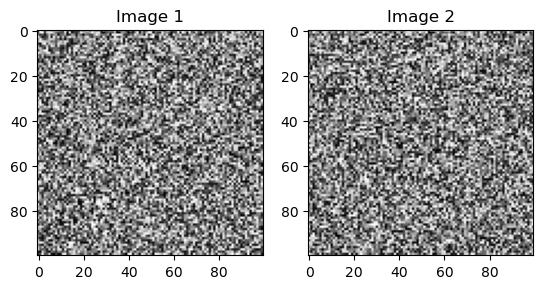

In [20]:
import matplotlib.pyplot as plt
plt.subplot(1, 2,1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')
plt.subplot(1,2,2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')